In [1]:
# importing required libraries
import pandas as pd

In [2]:
# reading the loan prediction data
train = pd.read_csv('train.csv')

In [3]:
train.shape

(94992, 3)

In [4]:
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [5]:
train.tail()

,row_id,datetime,energy
94987,94988,2018-12-31 19:00:00,2528.4468
94988,94989,2018-12-31 20:00:00,2461.8836
94989,94990,2018-12-31 21:00:00,2365.9944
94990,94991,2018-12-31 22:00:00,2342.9428
94991,94992,2018-12-31 23:00:00,2180.2176


In [6]:
test = pd.read_csv('test.csv')

In [7]:
test.shape

(26304, 2)

In [8]:
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [9]:
test['energy'] = train['energy'].min()

In [10]:
data = pd.concat([train, test], axis = 0)

In [11]:
# looking at the first five rows of the data
data.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [12]:
data.tail()

,row_id,datetime,energy
26299,121292,2021-12-31 19:00:00,866.3886
26300,121293,2021-12-31 20:00:00,866.3886
26301,121294,2021-12-31 21:00:00,866.3886
26302,121295,2021-12-31 22:00:00,866.3886
26303,121296,2021-12-31 23:00:00,866.3886


In [13]:
data.reset_index(inplace=True)

In [14]:
data.drop(columns = ['index'], inplace = True)

In [15]:
data.tail()

,row_id,datetime,energy
121291,121292,2021-12-31 19:00:00,866.3886
121292,121293,2021-12-31 20:00:00,866.3886
121293,121294,2021-12-31 21:00:00,866.3886
121294,121295,2021-12-31 22:00:00,866.3886
121295,121296,2021-12-31 23:00:00,866.3886


In [16]:
# shape of the data
data.shape

(121296, 3)

In [17]:
# checking missing values in the data
data.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [18]:
# data types of the variables
data.dtypes

row_id        int64
datetime     object
energy      float64
dtype: object

In [19]:
# drop Item Identifier
data.drop(columns = ['row_id'], inplace = True)

In [20]:
data['datetime'] = pd.to_datetime(data.datetime)

In [21]:
data.dtypes

datetime    datetime64[ns]
energy             float64
dtype: object

## Feature Engineering

In [22]:
data['year'] = data['datetime'].dt.year

In [23]:
data['month'] = data['datetime'].dt.month

In [24]:
data['weekday'] = data['datetime'].dt.weekday 

In [25]:
data['day'] = data['datetime'].dt.day

In [26]:
data['hour'] = data['datetime'].dt.hour

In [28]:
data['week'] = data['datetime'].dt.week

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\8062849.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['datetime'].dt.week


In [30]:
data.head()

,datetime,energy,year,month,weekday,day,hour,week
0,2008-03-01 00:00:00,1259.985563,2008,3,5,1,0,9
1,2008-03-01 01:00:00,1095.541500,2008,3,5,1,1,9
2,2008-03-01 02:00:00,1056.247500,2008,3,5,1,2,9
3,2008-03-01 03:00:00,1034.742000,2008,3,5,1,3,9
4,2008-03-01 04:00:00,1026.334500,2008,3,5,1,4,9


In [31]:
data.drop(columns = ['datetime'], inplace = True)

In [32]:
data.head()

,energy,year,month,weekday,day,hour,week
0,1259.985563,2008,3,5,1,0,9
1,1095.541500,2008,3,5,1,1,9
2,1056.247500,2008,3,5,1,2,9
3,1034.742000,2008,3,5,1,3,9
4,1026.334500,2008,3,5,1,4,9


In [33]:
## Get back train and test sets

train = data.iloc[0:94992]
test = data.iloc[94992:]

In [34]:
train.head()

,energy,year,month,weekday,day,hour,week
0,1259.985563,2008,3,5,1,0,9
1,1095.541500,2008,3,5,1,1,9
2,1056.247500,2008,3,5,1,2,9
3,1034.742000,2008,3,5,1,3,9
4,1026.334500,2008,3,5,1,4,9


In [35]:
train.shape

(94992, 7)

In [36]:
test.head()

,energy,year,month,weekday,day,hour,week
94992,866.3886,2019,1,1,1,0,1
94993,866.3886,2019,1,1,1,1,1
94994,866.3886,2019,1,1,1,2,1
94995,866.3886,2019,1,1,1,3,1
94996,866.3886,2019,1,1,1,4,1


In [37]:
test.drop(columns = ['energy'], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\1158755778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = ['energy'], inplace = True)


In [38]:
test.head()

,year,month,weekday,day,hour,week
94992,2019,1,1,1,0,1
94993,2019,1,1,1,1,1
94994,2019,1,1,1,2,1
94995,2019,1,1,1,3,1
94996,2019,1,1,1,4,1


## Exploration

In [39]:
import seaborn as sns

<AxesSubplot: xlabel='year', ylabel='energy'>

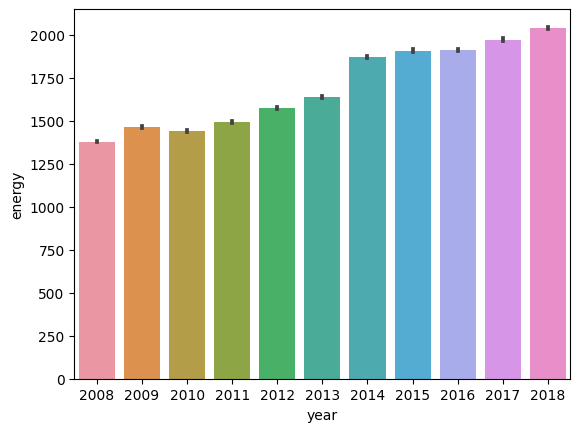

In [40]:
sns.barplot(data=train, x = 'year', y = 'energy')

<AxesSubplot: xlabel='month', ylabel='energy'>

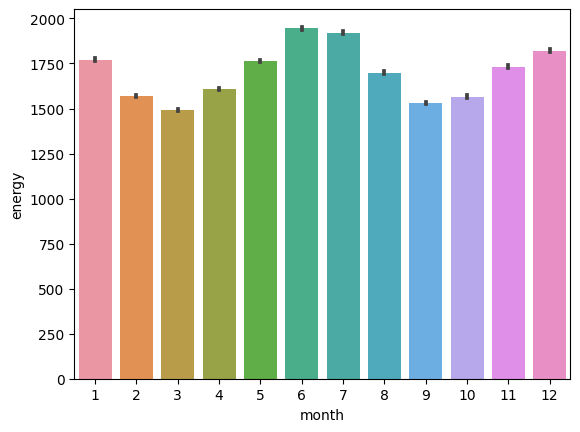

In [41]:
sns.barplot(data=train, x = 'month', y = 'energy')

<AxesSubplot: xlabel='day', ylabel='energy'>

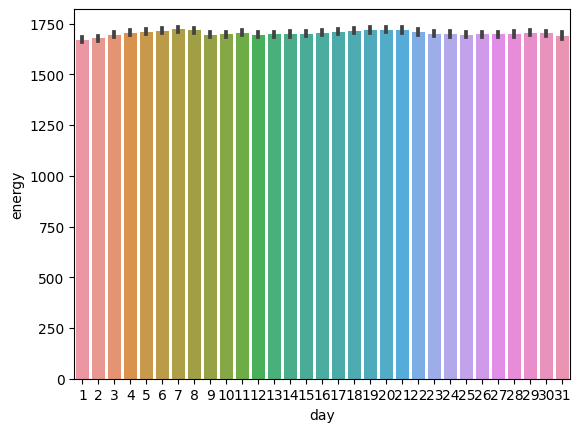

In [42]:
sns.barplot(data=train, x = 'day', y = 'energy')

<AxesSubplot: xlabel='hour', ylabel='energy'>

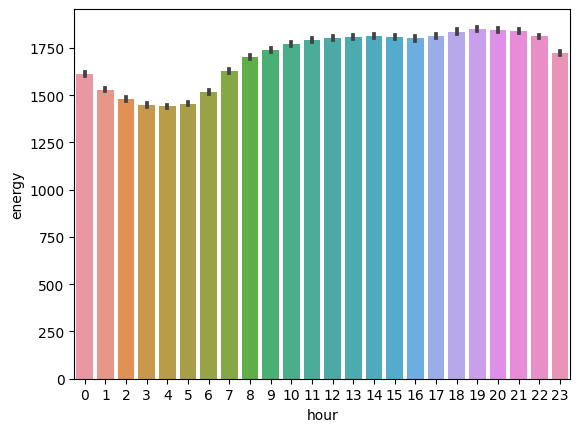

In [43]:
sns.barplot(data=train, x = 'hour', y = 'energy')

<AxesSubplot: xlabel='weekday', ylabel='energy'>

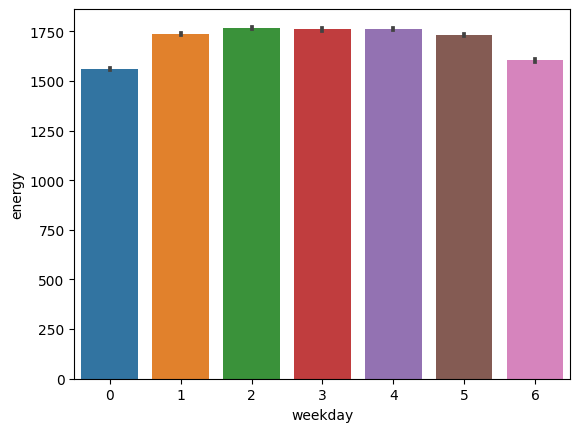

In [44]:
sns.barplot(data=train, x = 'weekday', y = 'energy')

<AxesSubplot: xlabel='week', ylabel='energy'>

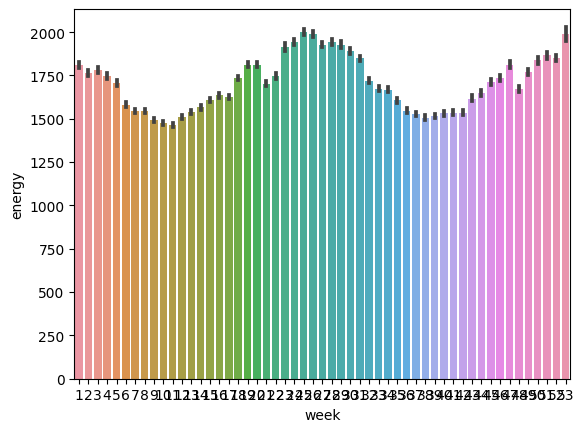

In [46]:
sns.barplot(data=train, x = 'week', y = 'energy')

In [47]:
data['month'] = data['month'].astype('category')
data['week'] = data['week'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['hour'] = data['hour'].astype('category')
data['day'] = data['day'].astype('category')

In [48]:
data.dtypes

energy      float64
year          int64
month      category
weekday    category
day        category
hour       category
week       category
dtype: object

In [49]:
#One-Hot encoding as energy is not linearly dependent on variables except year
data = pd.get_dummies(data)

In [50]:
data.head()

,energy,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
0,1259.985563,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1095.541500,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1056.247500,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1034.742000,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1026.334500,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
data['energy'].fillna(data['energy'].mean(), inplace = True)

In [54]:
data.isnull().sum()

energy     0
year       0
month_1    0
month_2    0
month_3    0
          ..
week_49    0
week_50    0
week_51    0
week_52    0
week_53    0
Length: 129, dtype: int64

In [67]:
## Get back train and test sets

train = data.iloc[0:94992]
test = data.iloc[94992:]
test.drop(columns = ['energy'], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10188\847807208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns = ['energy'], inplace = True)


In [68]:
train.head()

,energy,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
0,1259.985563,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1095.541500,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1056.247500,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1034.742000,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1026.334500,2008,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
train.shape

(94992, 129)

In [70]:
test.head()

,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
94992,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94993,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94994,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94995,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94996,2019,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
test.shape

(26304, 128)

In [72]:
train_y = train['energy']

In [73]:
train_x = train.drop(columns = ['energy'])

In [74]:
train_x.head()

,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
0,2008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
# Full Linear Regression Model
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [77]:
prediction = model.predict(test)

In [78]:
sample  = pd.read_csv('sample_submission.csv')

In [79]:
sample['energy'] = prediction

In [81]:
sample.to_csv('submission.csv', index = False)